In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from pylab import *
mpl.rcParams['font.sans-serif']=['SimHei'] #正常显示中文

In [2]:
Location = r'C:\Users\28646\ANumpy,Pandas,Matplotlib\qiancheng_data.csv'
df = pd.read_csv(Location,encoding='gbk')
df

,title,company_name,salary,company_site,experience_required,edu_required,release_time,company_welfare,job_info,company_location,company_info
0,Python开发工程师,联合永道（上海）信息技术有限公司,1-1.5万/月,北京-顺义区,无工作经验,招3人,12-06发布,"['五险一金', '免费班车', '员工旅游', '交通补贴', '餐饮补贴', '工作环境...","['1.精通Python', '2.熟悉SQL语言，能熟练使用mysql，了解常用的SQL性...",'北京市顺义区后沙峪 中国航信高科技产业园',联合永道是一家专注于教育领域软件产品研发与销售的高新技术企业，主要从事教育软件产品的开发及应...
1,Python实习-机器学习方向,寰宇优才教育科技（北京）有限公司,0.8-1万/月,北京-朝阳区,无工作经验,招6人,12-06发布,"['五险一金', '补充医疗保险', '补充公积金', '员工旅游', '交通补贴', '出...","['（能力不足，但有Python开发意向者，可放宽要求提供实习岗位）', '', '1.本科...",'新文化大街',寰宇优才教育科技（北京）有限公司
2,Python开发工程师,北京万维盈创科技发展有限公司,0.8-1.5万/月,北京-昌平区,无工作经验,本科,12-06发布,"['年终奖金', '员工旅游', '定期体检', '专业培训', '交通补贴', '通讯补贴...","['岗位职责：', '1.协助团队进行桌面应用开开发框架的搭建、设计及开发规划；', '2....",'北七家镇TBD云集中心',北京万维盈创科技发展有限公司（简称万维盈创）是一家专业的环保物联网产品与解决方案提供商。公司...
3,Python开发工程师,北京学神科技有限公司,1-1.5万/月,北京-昌平区,3-4年经验,大专,12-06发布,"['弹性工作', '年终奖金', '绩效奖金', '专业培训', '周末双休']","['', '岗位职责：', '1.围绕项目开展教学工作；', '2.给学生讲授知识点技术点以...",'昌平南邵',“学神IT教育”（网址：www.xuegod.cn）是北京学神科技有限公司旗下的在线教育品牌...
4,Python研发负责人(001066)\t\t\t\t(职位编号：rong360001066),北京融联世纪信息技术有限公司,3-5万/月,北京,无工作经验,本科,12-06发布,[],"['1.负责RC系统整体规划工作,负责团队工作；2.负责风控系统在线服务的设计、优化和研发工...",'时代网络大厦',融360（www、rong360、com）北京融联世纪信息技术有限公司，成立于2011年10...
5,全栈python开发工程师,北京道冲泰科科技有限公司,15-20万/年,北京-朝阳区,5-7年经验,本科,12-06发布,"['五险一金', '补充医疗保险', '员工旅游', '交通补贴', '餐饮补贴', '通讯...","['工作描述:', '*为桥梁、隧道、地铁等施工建设过程开发安全监测web平台', '*为公...",'北京市朝阳区酒仙桥中路26号鸿运大厦801',北京道冲泰科科技有限公司（DCTK）是欧美大地科技集团（ETG）旗下的一家以研发和生产土木工...
6,Python高级开发工程师,叠云（北京）科技股份有限公司,1.2-1.5万/月,北京,无工作经验,本科,12-06发布,"['五险一金', '定期体检', '周末双休']","['岗位职责：', '1、进行电子教室后台部分研发', '2、进行云端运维系统的研发', '...",'朝阳区北苑天畅园6号楼23层',"叠云（北京）科技股份有限公司（股票代码：871400,简称：叠云股份)是联想集团直接投资专注..."
7,Python高级开发工程师,南京高泰科技有限公司,2-2.5万/月,北京-石景山区,5-7年经验,本科,12-06发布,"['五险一金', '员工旅游', '餐饮补贴', '通讯补贴', '定期体检', '周末双休...","['1.5年以上开发经验，基本功扎实，精通Java；', '2.5年以上Linux经验，熟练...",'北京市石景山区苹果园街道八大处路45号点石商务公园8号楼7楼',我公司成立于2003年12月，是专业从事电信类软件开发和系统集成项目的科技型企业。公司拥有一...
8,Python开发工程师(石家庄）,北京慧铭软件有限公司,0.8-1万/月,石家庄,3-4年经验,大专,12-06发布,"['五险一金', '餐饮补贴', '专业培训', '绩效奖金', '年终奖金', '弹性工作']","['', 'Python', '岗位职责：', '1、负责运维自动化、监控、数据分析平台的开...",'河北省石家庄市裕华区昆仑大街89号中国移动通信',北京慧铭软件有限公司成立于2014年，公司专注于信息技术服务管理应用软件产品的策划、设计、研...
9,Python开发工程师-ZH,北京四维图新科技股份有限公司,2-4万/月,北京,5-7年经验,本科,12-06发布,"['五险一金', '补充医疗保险', '免费班车', '员工旅游', '专业培训', '餐饮...","['岗位职责：', '1、负责公司内部管理后台及商业化应用产品的开发；', '2、负责项目文...",'北京市海淀区永丰路与北清路交汇处四维图新大厦',北京四维图新科技股份有限公司（简称：四维图新，深交所股票代码：002405）是中国领先的数字...


In [3]:
print(df.shape)
df1 = df.drop_duplicates(inplace = False) #清除重复值
df1.shape

(5741, 11)


(5433, 11)

In [4]:
df2 = df1[df1['company_site'].str.startswith('北京')]

In [5]:
df2['company_site'].unique()

array(['北京-顺义区', '北京-朝阳区', '北京-昌平区', '北京', '北京-石景山区', '北京-海淀区', '北京-东城区',
       '北京-丰台区', '北京-延庆区', '北京-西城区', '北京-大兴区', '北京-房山区', '北京-通州区',
       '北京-门头沟区'], dtype=object)

In [6]:
df2.isnull().sum()

title                    0
company_name             0
salary                 529
company_site             0
experience_required      0
edu_required             0
release_time             0
company_welfare          0
job_info                 0
company_location       667
company_info             0
dtype: int64

In [7]:
df2.dropna(inplace=True)

C:\Users\28646\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
df2.isnull().sum()

title                  0
company_name           0
salary                 0
company_site           0
experience_required    0
edu_required           0
release_time           0
company_welfare        0
job_info               0
company_location       0
company_info           0
dtype: int64

In [10]:
salary = df2['salary']
salary.to_csv('薪资分布情况.txt')

# 北京那些地区提供的岗位比较多

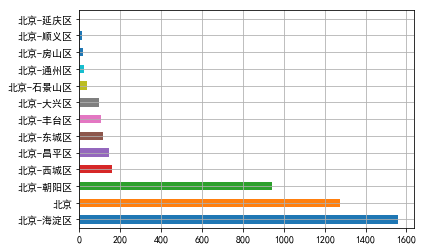

In [11]:
Position_in_Beijing = df2['company_site'].value_counts()[:13]
Position_in_Beijing.plot.barh(grid=True)   #北京-海淀区提供的岗位最多.

# 工作年限要求

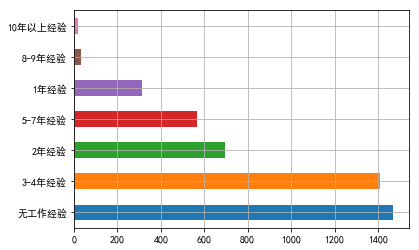

In [12]:
Seniority_Required = df2['experience_required'].value_counts()
Seniority_Required.plot.barh(grid=True); #Seniority_Required.plot.pie(autopct = '%.2f%%')

# 学历要求

In [13]:
edu_required = df2[df2['edu_required'].str.startswith('招')]
df2.drop(edu_required.index,inplace=True)

C:\Users\28646\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


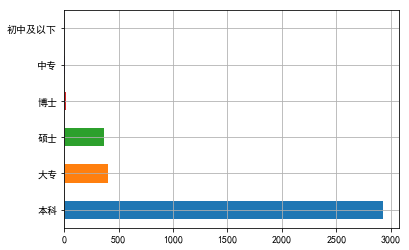

In [14]:
edu_required = df2['edu_required'].value_counts()
edu_required.plot.barh(grid=True);

# 需要的技能

In [15]:
job_info = df2['job_info']
job_info.to_csv('job_info.txt',index=False)
job_info

2       ['岗位职责：', '1.协助团队进行桌面应用开开发框架的搭建、设计及开发规划；', '2....
3       ['', '岗位职责：', '1.围绕项目开展教学工作；', '2.给学生讲授知识点技术点以...
4       ['1.负责RC系统整体规划工作,负责团队工作；2.负责风控系统在线服务的设计、优化和研发工...
5       ['工作描述:', '*为桥梁、隧道、地铁等施工建设过程开发安全监测web平台', '*为公...
6       ['岗位职责：', '1、进行电子教室后台部分研发', '2、进行云端运维系统的研发', '...
7       ['1.5年以上开发经验，基本功扎实，精通Java；', '2.5年以上Linux经验，熟练...
9       ['岗位职责：', '1、负责公司内部管理后台及商业化应用产品的开发；', '2、负责项目文...
10      ['', '', '**工作职责**', '', '1Web系统开发和维护；', '', '...
11      ['\n职能类别：\n\r\n\t\t\t\t\t\t\t\t\t\t互联网软件开发工程师\...
12      ['岗位职责：', '1、开发和维护公司核心产品的存储管理层；', '2、开发和维护公司核心...
14      ['岗位职责：', '1.研发python课程内容及课件；', '2.按照教学大纲、教学进度...
15      ['\n职能类别：\n\r\n\t\t\t\t\t\t\t\t\t\t软件工程师\t\t\t...
16      ['【岗位职责】', '1、深入分布式平台架构，发现并解决系统的重大故障及性能瓶颈，打造一流...
18      ['职位描述', '1.参与工厂能效大数据管理软件的需求分析、架构设计、代码开发、功能测试和...
19      ['服务器端研发', '', '要求：', '1、3年以上Python开发经验；', '2、...
20      ['1.Web后端业务逻辑层、数据层的实现；', '\xa0\xa0', '2.负责Web后...
21      ['', '负责系统设计和业务模块设计，编写核心代码和单元测试代码', '任职资格：', '...
22      ['', '

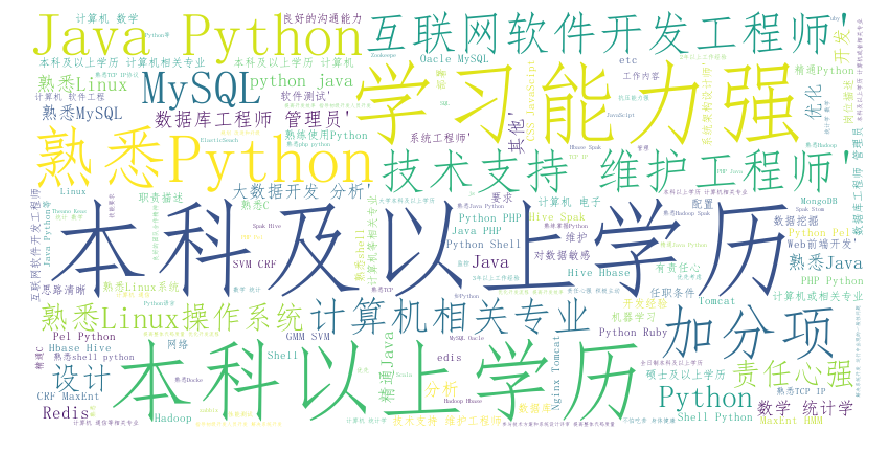

In [16]:
Location = r'C:\Users\28646\ANumpy,Pandas,Matplotlib\job_info.txt'
font = r'C:\Windows\Fonts\simfang.ttf'
text = open(Location,encoding='utf-8').read()
text = text.replace('xa0','').replace('\\n','').replace('\\t','').replace('岗位职责','').replace('任职要求','').replace('工作职责','').\
replace('任职资格','').replace('岗位要求','').replace('职能类别','').replace('职位要求','').replace('职位描述','').replace('r','').\
replace('软件工程师','').replace('算法工程师','').replace('高级','')
wc = WordCloud(background_color="white",font_path=font,width=800,height=400)
wc.generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wc)
plt.axis('off')
plt.show()

# 公司一般会提供的福利诱惑

In [17]:
company_welfare = df2['company_welfare']
company_welfare.to_csv('company_welfare.txt',index=False)
company_welfare

2       ['年终奖金', '员工旅游', '定期体检', '专业培训', '交通补贴', '通讯补贴...
3                ['弹性工作', '年终奖金', '绩效奖金', '专业培训', '周末双休']
4                                                      []
5       ['五险一金', '补充医疗保险', '员工旅游', '交通补贴', '餐饮补贴', '通讯...
6                                ['五险一金', '定期体检', '周末双休']
7       ['五险一金', '员工旅游', '餐饮补贴', '通讯补贴', '定期体检', '周末双休...
9       ['五险一金', '补充医疗保险', '免费班车', '员工旅游', '专业培训', '餐饮...
10                                       ['五险一金', '定期体检']
11      ['五险一金', '补充医疗保险', '专业培训', '绩效奖金', '年终奖金', '定期...
12      ['五险一金', '补充医疗保险', '员工旅游', '交通补贴', '餐饮补贴', '专业...
14                                                     []
15                                                     []
16       ['五险一金', '交通补贴', '餐饮补贴', '通讯补贴', '弹性工作', '定期体检']
18                                                     []
19                       ['五险一金', '专业培训', '年终奖金', '定期体检']
20                                                     []
21       ['交通补贴', '餐饮补贴', '通讯补贴', '加班补贴', '项目奖金', '五险一金']
22       ['五险一

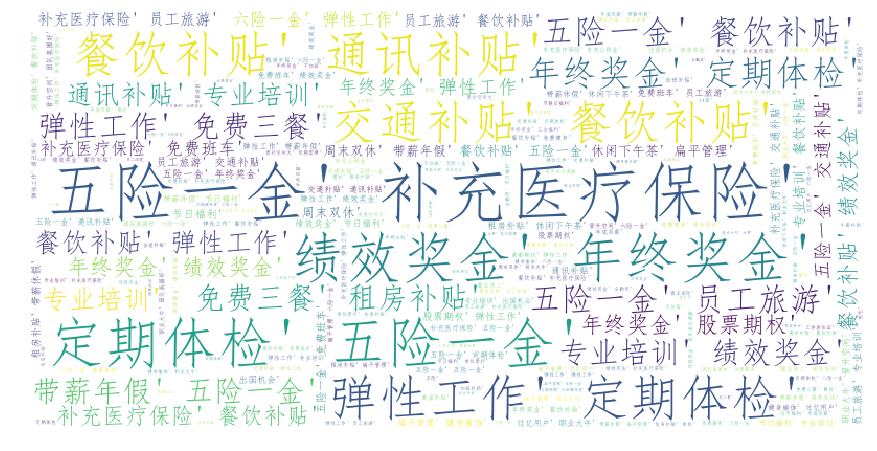

In [18]:
Location = r'C:\Users\28646\ANumpy,Pandas,Matplotlib\company_welfare.txt'
font = r'C:\Windows\Fonts\simfang.ttf'
text = open(Location,encoding='utf-8').read()
wc = WordCloud(background_color="white",font_path=font,width=800,height=400)
wc.generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wc)
plt.axis("off")
plt.show()

# 岗位分析

In [19]:
title = df2['title']
title.to_csv('job_analysis.txt',index=False)

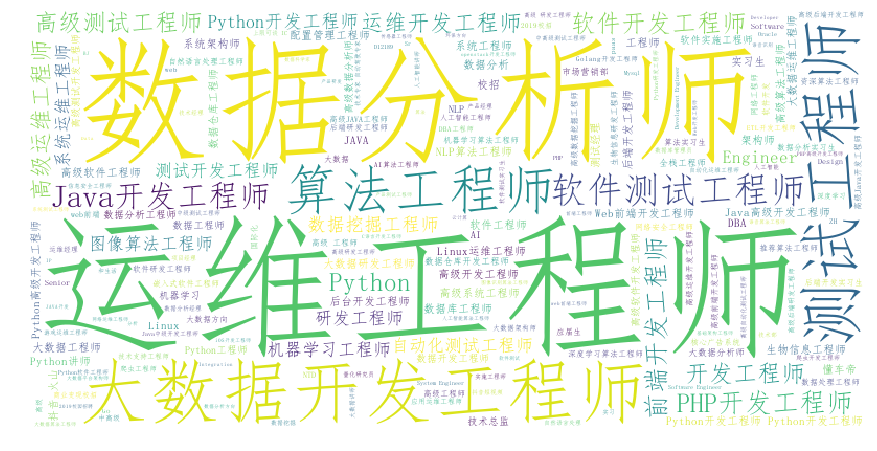

In [20]:
Location = r'C:\Users\28646\ANumpy,Pandas,Matplotlib\job_analysis.txt'
font = r'C:\Windows\Fonts\simfang.ttf'
text = open(Location,encoding='utf-8').read()
text = text.replace('职位编号','').replace('北京','')
wc = WordCloud(background_color="white",font_path=font,width=800,height=400)
wc.generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wc)
plt.axis("off")
plt.show()

# 薪资和地区的关系

In [21]:
Salary_Region = df2[['company_site','salary']]

Salary_Region.to_csv('Salary_Region.txt',index=False)

In [22]:
Location = r'C:\Users\28646\ANumpy,Pandas,Matplotlib\Salary_Region.txt'
Salary_Region = pd.read_csv(Location)
Salary_Region

,company_site,salary
0,北京-昌平区,0.8-1.5万/月
1,北京-昌平区,1-1.5万/月
2,北京,3-5万/月
3,北京-朝阳区,15-20万/年
4,北京,1.2-1.5万/月
5,北京-石景山区,2-2.5万/月
6,北京,2-4万/月
7,北京-朝阳区,1.5-2万/月
8,北京-海淀区,1.5-2万/月
9,北京-顺义区,1.5-3万/月


In [27]:
Salary_Region_salary = Salary_Region[Salary_Region['salary'].str.endswith('月')]

# 薪资分布

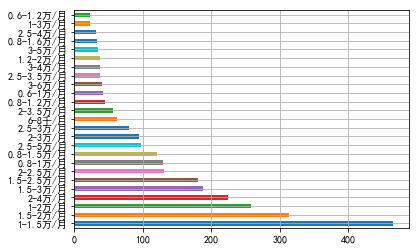

In [42]:
salary = Salary_Region_salary['salary'].value_counts()[:25]
salary.plot.barh(grid=True);  #薪资分布情况

In [53]:
Salary_Region_salary.sort_values('salary')

,company_site,salary
2861,北京-海淀区,0.4-1万/月
892,北京-海淀区,0.5-1.2万/月
1268,北京-海淀区,0.5-1.5万/月
84,北京-海淀区,0.5-1.5万/月
608,北京-朝阳区,0.5-1.5万/月
2549,北京-朝阳区,0.5-1.5万/月
3606,北京-海淀区,0.5-1.5万/月
656,北京-通州区,0.5-1.5万/月
3609,北京-海淀区,0.5-1.5万/月
2155,北京,0.5-1万/月


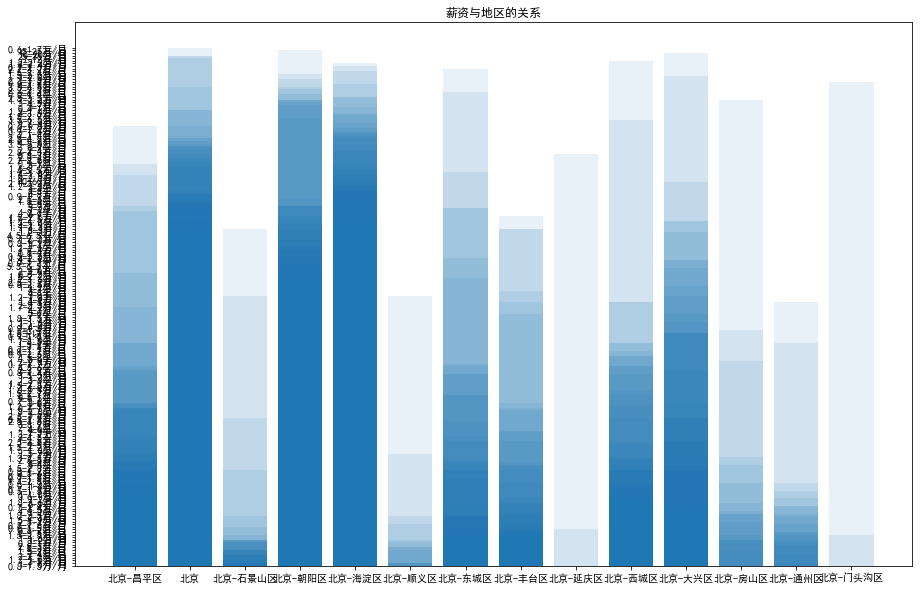

In [54]:
company_site = Salary_Region_salary['company_site']
salary = Salary_Region_salary['salary']
plt.figure(figsize=(15,10))
plt.title('薪资与地区的关系')
plt.bar(company_site,salary,alpha=0.1);